# 作業

實作各種不一樣的方式來調整飽和 / 對比 / 明亮

1. 改變 color space 來調整飽和度
2. 實作直方圖均衡
3. alpha/ beta 調整對比 / 明亮

In [1]:
import cv2
import IPython.display as display
from PIL import Image
from io import BytesIO
import numpy as np

img_path = 'images/lena.png'

# 以彩色圖片的方式載入
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

In [2]:
def imshow(a, fmt='png'):
    if len(a.shape) == 3:
        a = a[:, :, ::-1]
    a = np.uint8(np.clip(a, 0, 255))
    c = BytesIO()
    Image.fromarray(a).save(c, fmt)
    display.display(display.Image(data=c.getvalue()))

## 改變飽和度

- 轉換成 HSV color space, 改變 s channel 的值

change saturation


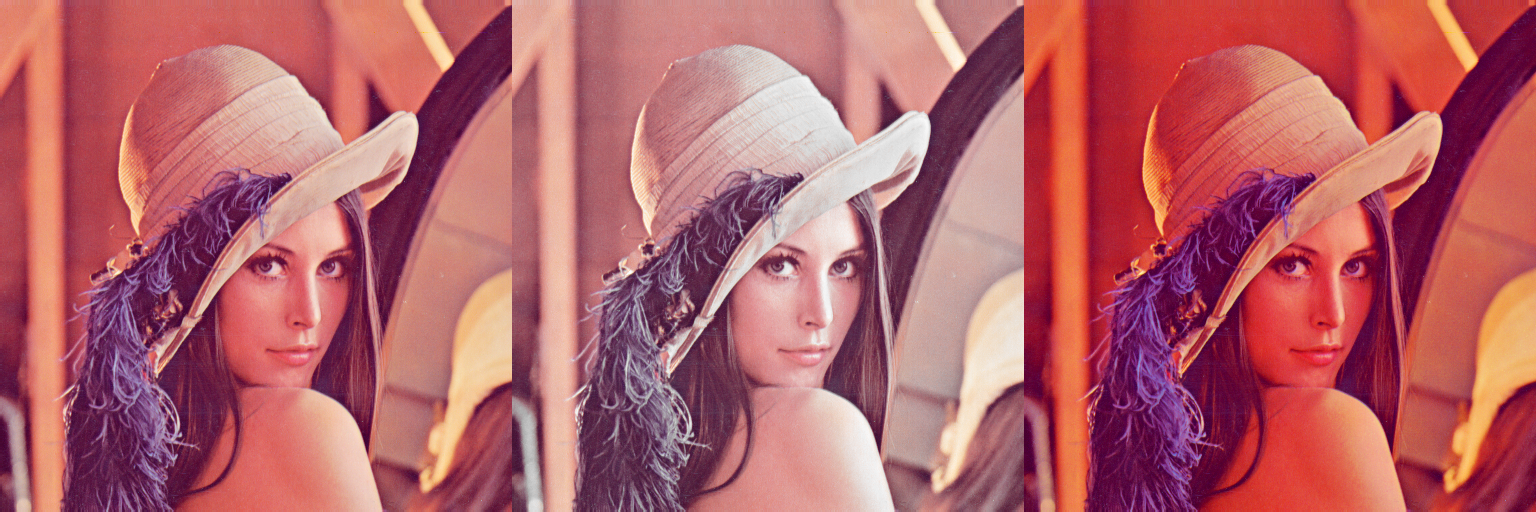

In [3]:
# 為了要改變飽和度，我們先把 color space 轉成 HSV 格式
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
change_percentage = 0.2

# 針對飽和度的值做改變，超過界線 0~1 的都會 bound
# 在 HSV color space 減少飽和度
f_img_hsv = img_hsv.astype(np.float64) / 255
f_img_hsv[:, :, 1] =  np.clip(f_img_hsv[:, :, 1] - change_percentage, 0, 1)
img_hsv_down = f_img_hsv

# 在 HSV color space 增加飽和度
f_img_hsv = img_hsv.astype(np.float64) / 255
f_img_hsv[:, :, 1] = np.clip(f_img_hsv[:, :, 1] + change_percentage, 0, 1)
img_hsv_up = f_img_hsv

# 轉換 color space 回 BGR
img_hsv_down = cv2.cvtColor(np.uint8(img_hsv_down * 255), cv2.COLOR_HSV2BGR)
img_hsv_up = cv2.cvtColor(np.uint8(img_hsv_up * 255), cv2.COLOR_HSV2BGR)

# 組合圖片 + 顯示圖片
img_hsv_change = np.hstack((img, img_hsv_down, img_hsv_up))

print('change saturation')
imshow(img_hsv_change)

## 直方圖均衡

1. case 1: 把彩圖拆開對每個 channel 個別做直方圖均衡再組合起來
2. case 2: 轉換 color space 到 HSV 之後對其中一個 channel 做直方圖均衡

bgr equal histogram


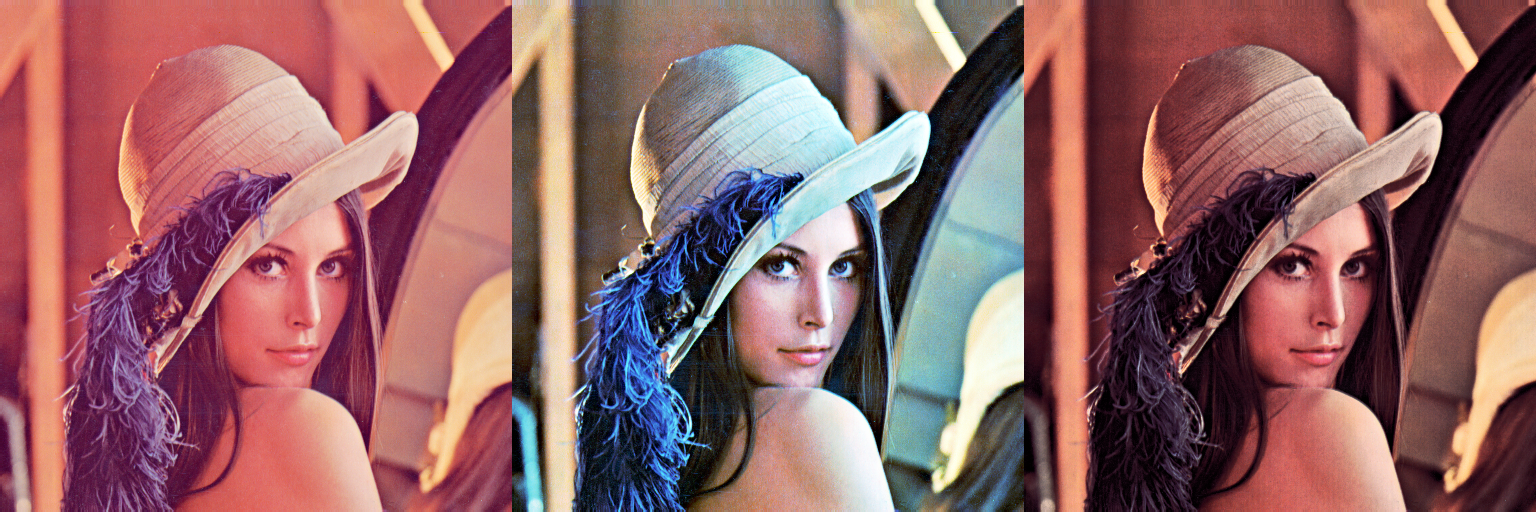

In [4]:
# case 1
# 每個 channel 個別做直方圖均衡
equalHist_by_b = cv2.equalizeHist(img[:, :, 0])
equalHist_by_g = cv2.equalizeHist(img[:, :, 1])
equalHist_by_r = cv2.equalizeHist(img[:, :, 2])

# 組合經過直方圖均衡的每個 channel
img_bgr_equal = cv2.merge([equalHist_by_b, equalHist_by_g, equalHist_by_r])

# case 2 - 轉換 color space 後只對其中一個 channel 做直方圖均衡
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_hsv_e = img_hsv.copy()
img_hsv_e[:, :, 2] = cv2.equalizeHist(img_hsv[:, :, 2])
img_hsv_equal = cv2.cvtColor(img_hsv_e, cv2.COLOR_HSV2BGR)

# 組合圖片 + 顯示圖片
img_bgr_equalHist = np.hstack((img, img_bgr_equal, img_hsv_equal))

# 比較 (原圖, BGR color space 對每個 channel 做直方圖均衡, HSV color space 對明度做直方圖均衡)
print('bgr equal histogram')
imshow(img_bgr_equalHist)

## 調整對比 / 明亮

adjust contrast and brighness


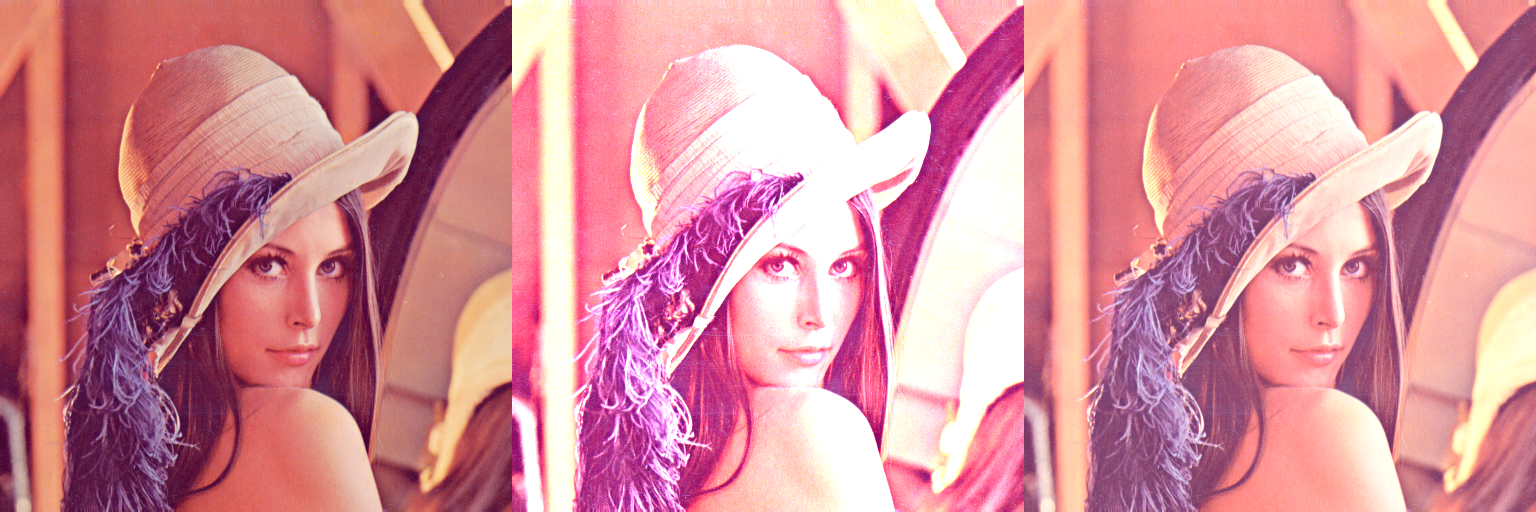

In [5]:
# alpha: 控制對比度 (1.0~3.0)
# beta: 控制明亮度 (0~255)
add_contrast = np.clip(2.0 * img + 0, 0, 255).astype(np.uint8)
add_lighness = np.clip(1.0 * img + 50, 0, 255).astype(np.uint8)

# 組合圖片 + 顯示圖片
img_contrast_light = np.hstack((img, add_contrast, add_lighness))

# 比較不同程度的對比 / 明亮
print('adjust contrast and brighness')
imshow(img_contrast_light)